<a href="https://colab.research.google.com/github/saurabh4742/ML_Projects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [13]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
X_train=X_train/255
X_test=X_test/255
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [14]:
class_name=['Airplane','Automobile','bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

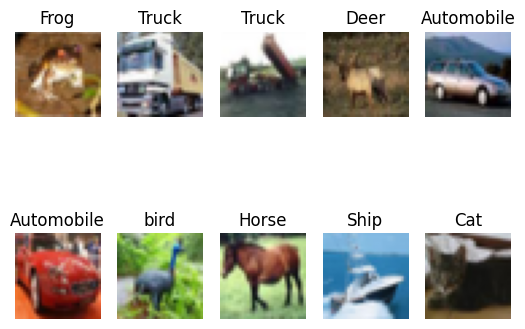

In [17]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_name[np.argmax(y_train[i])])
  plt.axis('off')
plt.show()

In [23]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',))

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.6603 - loss: 0.9702 - val_accuracy: 0.6579 - val_loss: 0.9692
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.6975 - loss: 0.8684 - val_accuracy: 0.6839 - val_loss: 0.9078
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.7116 - loss: 0.8200 - val_accuracy: 0.6937 - val_loss: 0.8722
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.7265 - loss: 0.7744 - val_accuracy: 0.6888 - val_loss: 0.9048
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.7459 - loss: 0.7310 - val_accuracy: 0.7021 - val_loss: 0.8641
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.7643 - loss: 0.6790 - val_accuracy: 0.6986 - val_loss: 0.8880
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.7750 - loss: 0.6465 - val_accuracy: 0.7148 - val_loss: 0.8556
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.7856 - loss: 0.6118 - 

In [53]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7127 - loss: 0.8653
0.872157633304596 0.7085000276565552


In [55]:
predictions=model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


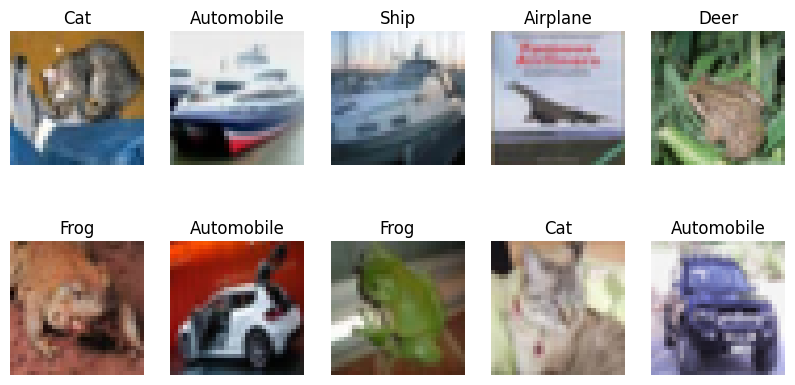

In [56]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  plt.title(class_name[np.argmax(predictions[i])])
  plt.axis('off')
plt.show()

In [57]:
model.save('saurabh_image_cnn_recog.keras')
model=tf.keras.models.load_model('saurabh_image_cnn_recog.keras')

In [58]:
image_path="apln.jpg"
img=image.load_img(image_path,target_size=(32,32))
img_array=image.img_to_array(img)
img_array=img_array/255.0
img_array=np.expand_dims(img_array,axis=0)


In [59]:
predictions = model.predict(img_array)

# Map prediction to class names (e.g., CIFAR-10 class names)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
predicted_class = class_names[np.argmax(predictions[0])]

print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Class: Airplane


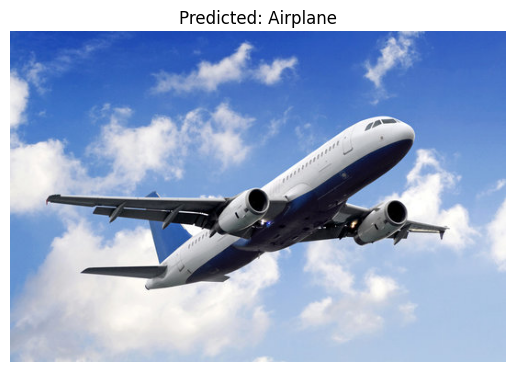

In [61]:
plt.imshow(image.load_img(image_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()